<a href="https://colab.research.google.com/github/MuhammadAhsan110/Sadiq/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices using Linear regression and Machine Learning 

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [93]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [94]:
HouseDF = pd.read_csv('HousePricePrediction.csv')
HouseDF.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [95]:
HouseDF.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [96]:
HouseDF.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

# **Exploratory Data Analysis**

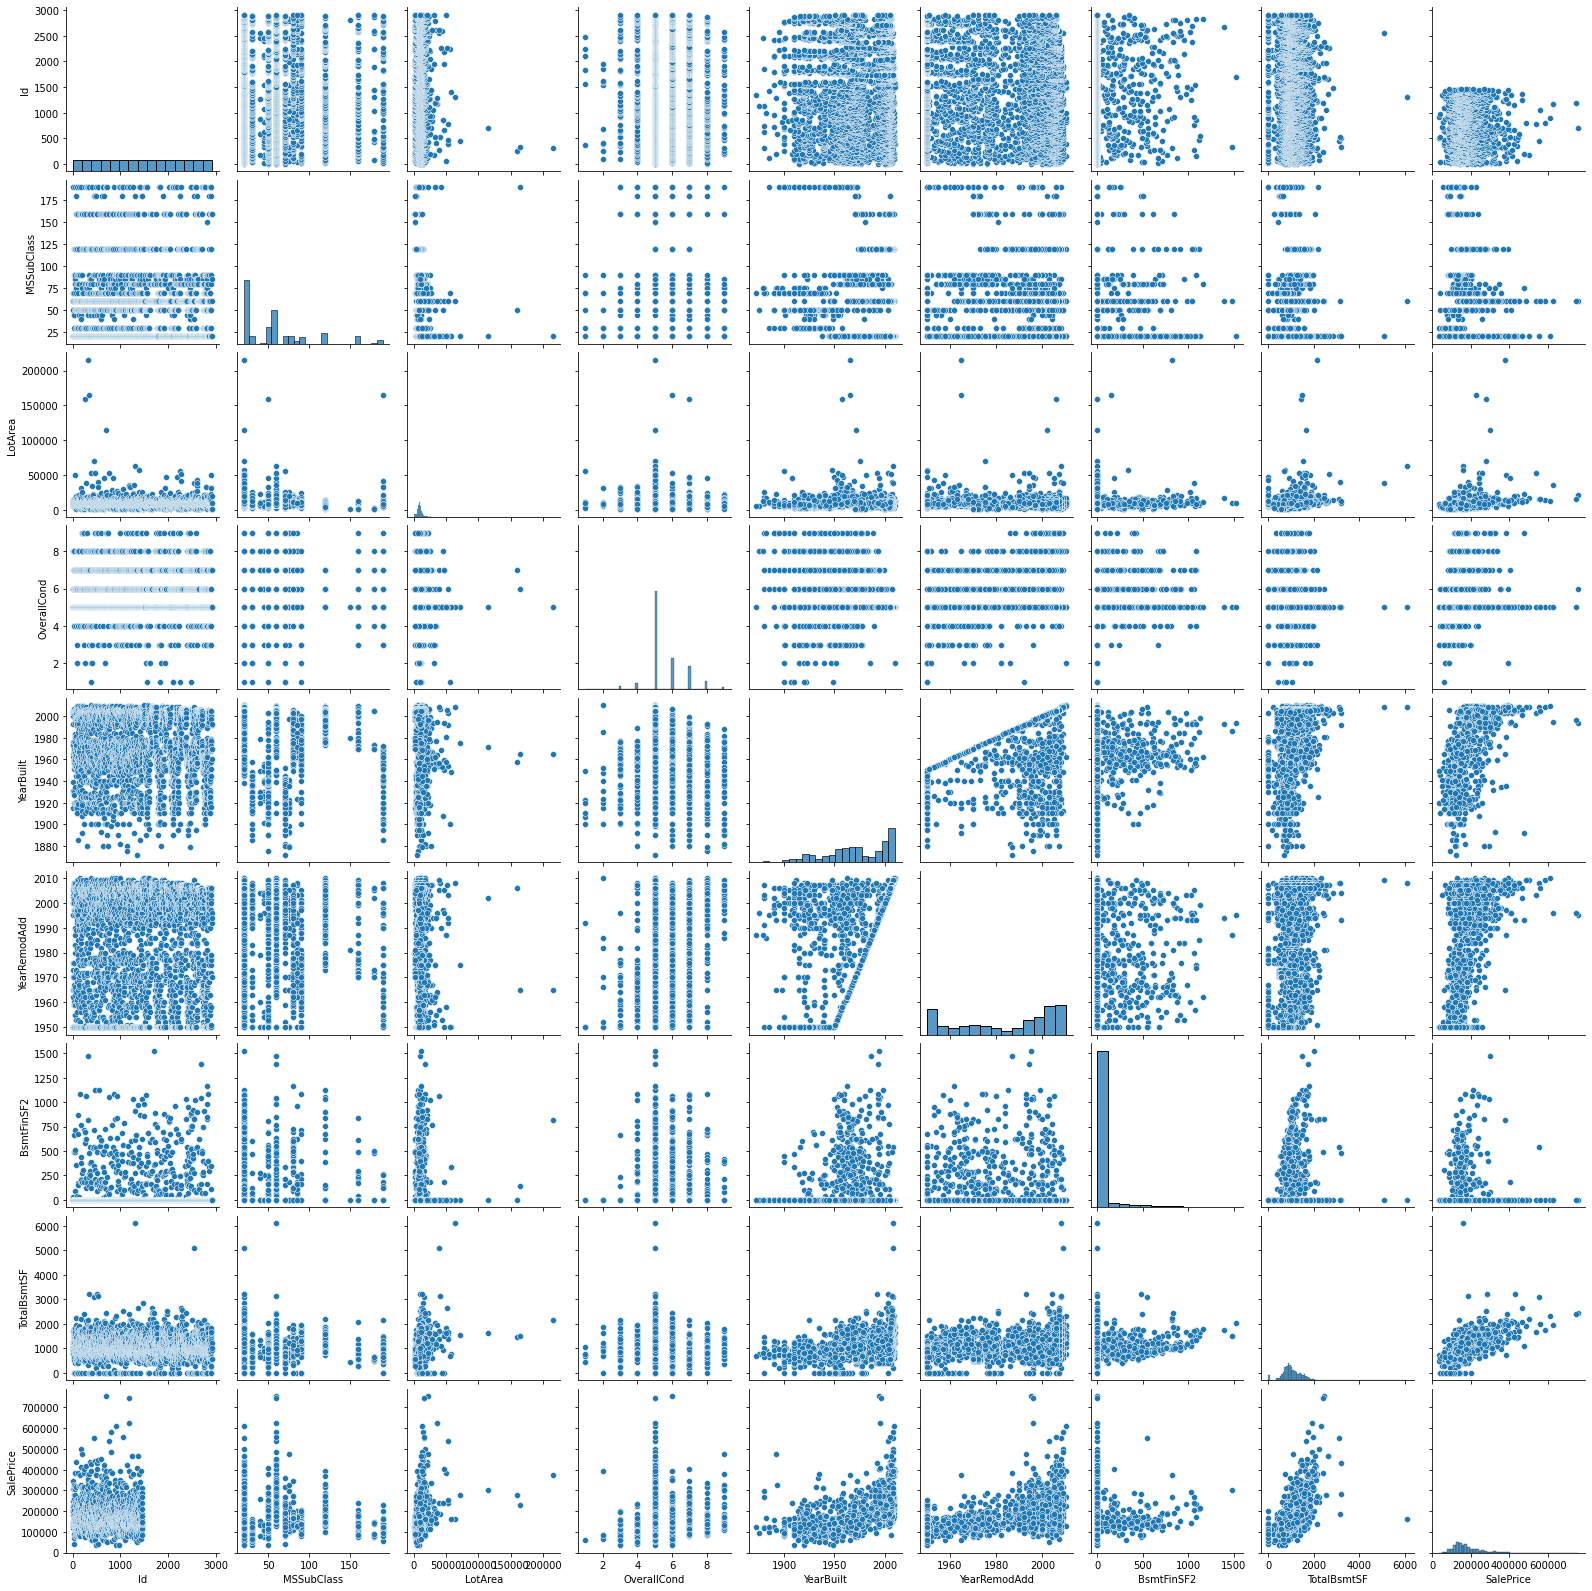

In [97]:
sns.pairplot(HouseDF)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

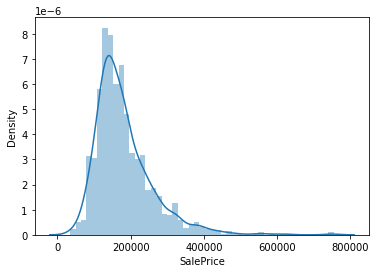

In [11]:
sns.distplot(HouseDF['SalePrice'])

# **Training Linear Regression Model**



In [73]:
HouseDF.head()
HouseDF.tail()
HouseDF.info()
HouseDF.describe()
HouseDF.isnull()
HouseDF.isnull().sum().sum()
HouseDF.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [74]:
X = HouseDF[['LotArea','OverallCond','YearBuilt','YearRemodAdd','TotalBsmtSF']]

y = HouseDF['SalePrice']

In [75]:
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
print(X)

      LotArea  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF
0        8450            5       2003          2003        856.0
1        9600            8       1976          1976       1262.0
2       11250            5       2001          2002        920.0
3        9550            5       1915          1970        756.0
4       14260            5       2000          2000       1145.0
...       ...          ...        ...           ...          ...
1455     7917            5       1999          2000        953.0
1456    13175            6       1978          1988       1542.0
1457     9042            9       1941          2006       1152.0
1458     9717            6       1950          1996       1078.0
1459     9937            6       1965          1965       1256.0

[1460 rows x 5 columns]


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [78]:
lm = LinearRegression()

In [79]:
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
print(lm.intercept_)

-2942628.8525934136


In [81]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotArea,1.641220
OverallCond,3600.595151
YearBuilt,699.793872
YearRemodAdd,815.154486
TotalBsmtSF,83.377403


In [82]:
predictions = lm.predict(X_test)

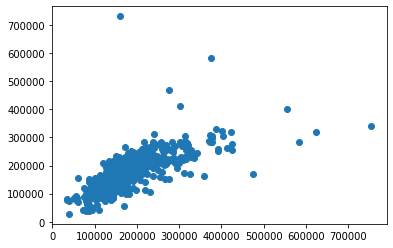

In [83]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


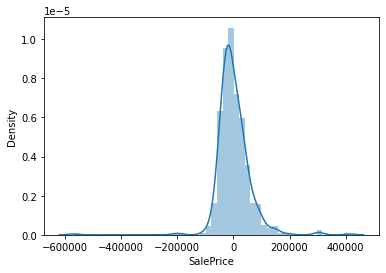

In [84]:
sns.distplot((y_test-predictions),bins=50);

In [85]:
from sklearn import metrics

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37699.389444599976
MSE: 3402586890.019981
RMSE: 58331.69712960511


# **Predicted Values:**

In [87]:
print(predictions)

[215753.41759015 137239.98825299 204053.24105428 264165.13563716
 306216.15327993 106794.53230454 155359.31456267 168091.10156503
 179022.00509168 169002.04117493 155791.29784107 168122.32267925
 144339.65527998 112071.82603516 226689.56734902 229335.69300011
 208644.57672863 153875.51074878 100392.95631749 282162.85853467
 142437.17642202  81492.50717507 237620.11640842 148046.5095797
 230077.26800653 160764.77819825 142484.86811483 196790.17872111
 184205.67663303 109449.01282513 195055.04976825 169591.50134238
 195372.93230923 269477.92020612  27729.15464748  41340.20455358
 331364.94830612 206748.84587255 137662.65939492  49262.78274354
 212874.46648436 195705.74433743 202771.8774972  177511.77491687
  91271.28894919 118809.35356821 229365.30250162 232107.80080477
 153656.62419147 109801.46756341 202026.42119132 275720.08996997
 139975.29821863 178053.46078467 191596.24625124 164894.19249127
 232018.21369032 261323.50096494 116142.31117327 255638.36509203
 247061.52945746 167047.28